In [1]:
!pip install pandas networkx matplotlib spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd

df = pd.read_csv("dataset_with_explore_and_research_summaries.csv")
df.head()


,id,title,species,environment,effect,abstract,conclusion,source_file,full_text,ai_summary,explore_summary,research_summary
0,2,Behavioral and multiomics,NaN,"soil, water, air",neutral,Behavioral and multiomics analysis of 3D clin...,"In summary, our research underscored that 3D c...",7.41598_2025_Article_90212.pdf,Behavioral and multiomics analysis of 3D clin...,(a) Flowchart of the experimental procedures a...,"Keywords Microgravity, Three-dimensional clino...","Keywords Microgravity, Three-dimensional clino..."
1,3,Madrigal et al. Microbiome (2022) 10...,E. coli,air,"toxic, neutral",Background: Antimicrobial resistance (AMR) has...,"Overall, our computational predictions and val...",2.40168_2022_Article_1332.pdf,Madrigal et al. Microbiome (2022) 10...,The objective of this study was to identify th...,The objective of this study was to identify th...,The objective of this study was to identify th...
2,4,cancers,NaN,air,toxic,Background: Ionizing radiation from galactic c...,s: We provided a,1.cancers-12-00381.pdf,cancers Article NASA GeneLab Platform Utilized...,The results from this analysis highlight novel...,Multiple datasets were included from human or ...,Results Using primarily in vivo animal models ...
3,5,Cell Structure and Function,R. varieornatus,"water, air","toxic, neutral","s Anhydrobiosis, a phenomenon in which organis...","In this study, we expressed R. varieornatus C...",4.csf_49_24035.pdf,Cell Structure and Function Cell Structure and...,"Key words anhydrobiosis, Tardigrades, live ima...","The cDNAs of R. varieornatus CAHS1, CAHS3, CA...",Anhydrobiosis is observed in both microorganis...
4,6,Perspective https://doi.org/10.103 8/s41467-02...,NaN,air,neutral,Perspective https://doi.org/10.103 8/s41467-02...,We are entering an exciting new era of space e...,3.41467_2023_Article_44357.pdf,Perspective https://doi.org/10.103 8/s41467-02...,Ethical issues related to the dangers and sele...,Health concerns and ethical considerations reg...,"In this piece, we lay out several pressing iss..."


In [6]:
from collections import Counter

# Flatten all entities into one list
all_entities = [ent for ents in df["entities"] for ent in ents]
top_entities = [ent for ent, count in Counter(all_entities).most_common(30)]  # top 30

# Filter graph with only these entities
G = nx.Graph()
for entities in df["entities"]:
    filtered = [e for e in entities if e in top_entities]
    for i in range(len(filtered)):
        for j in range(i+1, len(filtered)):
            G.add_edge(filtered[i], filtered[j])


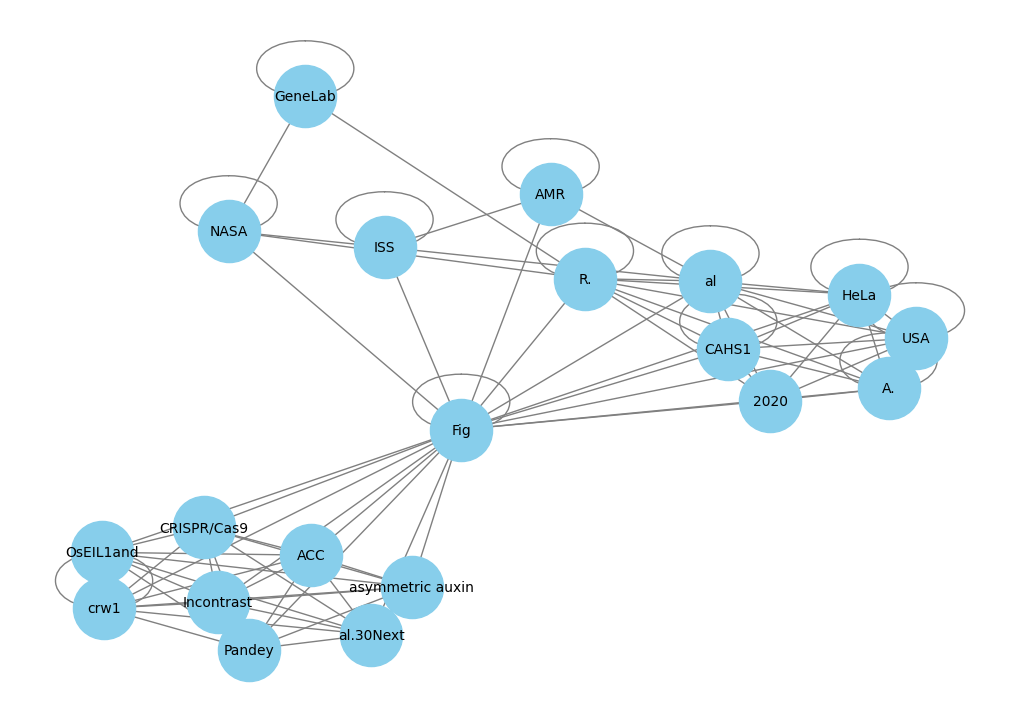

In [7]:
sub_nodes = list(G.nodes)[:20]  # first 20 nodes
subG = G.subgraph(sub_nodes)

plt.figure(figsize=(10, 7))
nx.draw(subG, with_labels=True, node_color="skyblue", edge_color="gray", node_size=2000, font_size=10)
plt.show()
